# Criando os nomes

In [2]:
import pandas as pd

In [3]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [4]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()

In [7]:
nomes.sample(5)

,nome
5,JULIANA
166,MICHEL
100,ROSELI
108,VALTER
82,DAVID


# Incluindo ID dos alunos

In [8]:
import numpy as np
np.random.seed(123)

In [9]:
total_alunos = len(nomes)
total_alunos

400

In [10]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [11]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [12]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [13]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [14]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [16]:
!pip3 install html5lib
!pip3 install lxml

In [17]:
import html5lib

In [18]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [19]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [20]:
type(cursos)

list

In [21]:
cursos = cursos[0]

In [22]:
type(cursos)

pandas.core.frame.DataFrame

In [23]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando index de cursos

In [24]:
cursos = cursos.rename(columns = {'Nome do curso': 'nome_do_curso'})

In [25]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [26]:
cursos['id'] = cursos.index + 1

In [27]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [28]:
cursos = cursos.set_index('id')

In [29]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [30]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [31]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [32]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1


In [33]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [34]:
import seaborn as sns

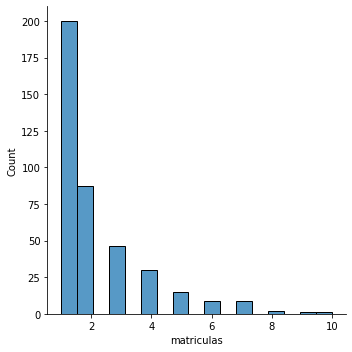

In [35]:
sns.displot(nomes.matriculas)

In [36]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
10      1
9       1
Name: matriculas, dtype: int64

In [37]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,2


# Selecionando cursos

In [38]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
154,NICOLE,182,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,2
191,TERESA,264,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,1


In [39]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [40]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [41]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19


In [42]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python
6,17,PHP com MySql
7,56,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [43]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
167,TAINARA,128,@servicodoemail.com,tainara@servicodoemail.com,2
141,NEIDE,325,@dominiodoemail.com.br,neide@dominiodoemail.com.br,1
88,GILMAR,142,@servicodoemail.com,gilmar@servicodoemail.com,1


In [44]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [45]:
matriculas.head()

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19


In [46]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

In [47]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python


# Saída em diferentes formatos

In [48]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web


In [51]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', sep = ';',index = False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv', sep = ';')

In [53]:
matriculas_json = matriculas_por_curso.to_json()

In [54]:
matriculas_json

'{"quantidade_de_alunos":{"1":62,"2":52,"3":25,"4":33,"5":59,"6":17,"7":56,"8":37,"9":70,"10":12,"11":81,"12":22,"13":52,"14":31,"15":82,"16":16,"17":44,"18":23,"19":67,"20":18},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [55]:
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
print(matriculas_html)

# Criando o banco sql

In [58]:
!pip install sqlalchemy

In [59]:
from sqlalchemy import create_engine, MetaData, Table

In [60]:
engine = create_engine('sqlite:///:memory:')

In [61]:
engine

Engine(sqlite:///:memory:)

In [62]:
type(engine)

sqlalchemy.engine.base.Engine

In [64]:
matriculas_por_curso.to_sql('matriculas', engine)

In [66]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do banco sql

In [67]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [68]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,6,17,PHP com MySql
1,10,12,Código limpo com C#
2,16,16,Estatística básica
3,20,18,Orientação objetos com Java


In [69]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,62
1,Java para Web,52
2,C# para Web,25
3,Ruby on Rails,33
4,Cursos de Python,59
5,PHP com MySql,17
6,.NET para web,56
7,Novas integrações com Java,37
8,TDD com Java,70
9,Código limpo com C#,12


In [70]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [74]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [75]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
10,Preparatório para certificação Java,81
14,Análise de dados,82


# Escrevendo no banco

In [76]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [78]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [80]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,52,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,59,Cursos de Python
6,17,PHP com MySql
7,56,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [81]:
matriculas

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19
...,...,...
854,383,19
855,366,2
856,366,15
857,366,6


In [82]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
95,259,16
155,151,16
176,179,16
178,179,16
334,368,16
354,202,16
416,389,16
424,319,16
720,184,16
742,378,16


In [83]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
188,POLIANA,369,@servicodoemail.com,poliana@servicodoemail.com,2
12,AMANDA,217,@servicodoemail.com,amanda@servicodoemail.com,1
185,SHEILA,116,@dominiodoemail.com.br,sheila@dominiodoemail.com.br,1


In [84]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
147,16,VINICIOS,@servicodoemail.com,vinicios@servicodoemail.com,3
151,16,TEREZA,@servicodoemail.com,tereza@servicodoemail.com,1
179,16,TAIS,@dominiodoemail.com.br,tais@dominiodoemail.com.br,4
179,16,TAIS,@dominiodoemail.com.br,tais@dominiodoemail.com.br,4
184,16,JUNIOR,@dominiodoemail.com.br,junior@dominiodoemail.com.br,3
202,16,ESTER,@servicodoemail.com,ester@servicodoemail.com,8
206,16,ITALO,@dominiodoemail.com.br,italo@dominiodoemail.com.br,1
214,16,JAIME,@servicodoemail.com,jaime@servicodoemail.com,5
259,16,RAIMUNDA,@servicodoemail.com,raimunda@servicodoemail.com,1


In [85]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
147    VINICIOS
151      TEREZA
179        TAIS
179        TAIS
184      JUNIOR
202       ESTER
206       ITALO
214       JAIME
259    RAIMUNDA
319        INES
359     ARNALDO
362     NIVALDO
368      CLEIDE
378        HUGO
389     LIDIANE
398    CRISTIAN
Name: nome, dtype: object

In [87]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
147,VINICIOS
151,TEREZA
179,TAIS
179,TAIS
184,JUNIOR
202,ESTER
206,ITALO
214,JAIME
259,RAIMUNDA


In [92]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [93]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [95]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [96]:
proxima_turma

,nome
id_aluno,
147,VINICIOS
151,TEREZA
179,TAIS
179,TAIS
184,JUNIOR
202,ESTER
206,ITALO
214,JAIME
259,RAIMUNDA


In [98]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [101]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
214,JAIME
179,TAIS
184,JUNIOR
319,INES
398,CRISTIAN


# Excel

In [103]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [105]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,VINICIOS
1,TEREZA
2,TAIS
3,TAIS
4,JUNIOR
5,ESTER
6,ITALO
7,JAIME
8,RAIMUNDA
9,INES
